# Part IV: Clustering and Visualising

> Jump to :  
* [Part 1](https://github.com/Niladri-B/Coursera_Captstone/blob/master/wk4/Capstone_part1.ipynb) *Extracting Street Addresses & Coordinates* 
* [Part 2](https://github.com/Niladri-B/Coursera_Captstone/blob/master/wk4/Capstone_part2-forUpload.ipynb), *Extracting Foursquare Data*
* [Part 3](https://github.com/Niladri-B/Coursera_Captstone/blob/master/wk4/Capstone_part3.ipynb) , *Exploratory Data Analysis*
* [Part 5](https://github.com/Niladri-B/Coursera_Captstone/blob/master/wk4/Capstone_part5.ipynb), *Conclusion & Discussion*

## Step 1: Load environment and data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [7]:
orderedStreetTrikkBussMetroTog = pd.read_csv('./orderedStreetTrikkBusMetroTog.csv')
orderedStreetTrikkBussMetroTog.head()

Street  Street Latitude  Street Longitude  \
0         Lilletorget        59.913500         10.755900   
1  Europarådets plass        59.912000         10.749300   
2             Brugata        59.914005         10.755774   
3         Pløens gate        59.913900         10.749325   
4  Sonja Henies plass        59.912700         10.755500   

                      Trikk  Trikk Distance          0  \
0  Jernbanetorget (Trikk/B)           356.0   buss 500   
1  Jernbanetorget (Trikk/B)            48.0  Buss 31 E   
2  Jernbanetorget (Trikk/B)           375.0    Buss 30   
3  Jernbanetorget (Trikk/B)           187.0    Buss 54   
4                       NaN             NaN   Buss 252   

                               1                            2        3  \
0                        Buss 30                     Buss 252  Buss 70   
1                        Buss 34  Buss 542 Seiersten Ekspress  Buss 54   
2                       buss 500                     Buss 252  Buss 54   
3                        Buss 31                      Buss 54  Buss 30   
4  platform 29 oslo bussterminal                     buss 500  Buss 70   

          4  ...                                  16  \
0   Buss 34  ...  550 Oslo Bussterminal - Lillestrøm   
1  Buss 82E  ...                          81A-bussen   
2   Buss 70  ...  Plattform 18 - Buss 411 Lillestrøm   
3   Buss 37  ...       platform 29 oslo bussterminal   
4   Buss 30  ...  550 Oslo Bussterminal - Lillestrøm   

                                         17                     T-bane_1  \
0        Plattform 18 - Buss 411 Lillestrøm  ('Jernbanetorget (T)', 248)   
1             platform 29 oslo bussterminal  ('Jernbanetorget (T)', 164)   
2                                       NaN  ('Jernbanetorget (T)', 277)   
3                                       NaN  ('Jernbanetorget (T)', 241)   
4  plattform 20-Buss 501 enebakk-Lillestrøm  ('Jernbanetorget (T)', 190)   

                  T-bane_2 T-bane_3 T-bane_4                 Train Station  \
0    ('Grønland (T)', 318)      NaN      NaN  ('Oslo Sentralstasjon', 332)   
1  ('Stortinget (T)', 420)      NaN      NaN  ('Oslo Sentralstasjon', 300)   
2    ('Grønland (T)', 345)      NaN      NaN  ('Oslo Sentralstasjon', 384)   
3  ('Stortinget (T)', 428)      NaN      NaN  ('Oslo Sentralstasjon', 443)   
4    ('Grønland (T)', 327)      NaN      NaN  ('Oslo Sentralstasjon', 240)   

  Total Transport Total Bus Binned Transport  
0              22        18            19-22  
1              22        18            19-22  
2              21        17            19-22  
3              21        17            19-22  
4              21        18            19-22  

[5 rows x 31 columns]

## Step 2: K-Means Clustering

In [4]:
#K-means clustering on Total Transport
kclusters = 7

#Create object
kmClust = KMeans(init = 'k-means++', n_clusters = kclusters, n_init= 12, random_state= 1)

#Fit
kmLabels = kmClust.fit(orderedStreetTrikkBussMetroTog[['Total Transport']])

#Check labels
kmLabels.labels_[0:6]

array([3, 3, 3, 3, 3, 3], dtype=int32)

In [8]:
#Insert into dataframe of ordered bus trikk
#orderedStreetTrikkBussMetroTog.drop('Cluster', axis = 'columns', inplace = True)#In case Cluster exists already from previous rounds
orderedStreetTrikkBussMetroTog.insert(3, 'Cluster', kmLabels.labels_)
orderedStreetTrikkBussMetroTog.head(20)

Street  Street Latitude  Street Longitude  Cluster  \
0                Lilletorget        59.913500         10.755900        3   
1         Europarådets plass        59.912000         10.749300        3   
2                    Brugata        59.914005         10.755774        3   
3                Pløens gate        59.913900         10.749325        3   
4         Sonja Henies plass        59.912700         10.755500        3   
5                     Nygata        59.913150         10.750750        3   
6                Kirkeristen        59.913000         10.747450        3   
7               Lybekkergata        59.913567         10.752767        3   
8             Jernbanetorget        59.911300         10.750425        3   
9                Stenersgata        59.913111         10.752633        3   
10     Biskop Gunnerus’ gate        59.912050         10.752583        3   
11               Skippergata        59.910339         10.747331        3   
12                Stortorvet        59.912733         10.745589        3   
13                Strandgata        59.909950         10.749200        3   
14              Olafiagangen        59.912900         10.759117        3   
15  Anne-Cath. Vestlys plass        59.908700         10.752100        3   
16        Robert Levins gate        59.908433         10.753400        3   
17         Fred. Olsens gate        59.909600         10.747857        3   
18         Henny Mürers gang        59.908256         10.754389        0   
19              Youngstorget        59.914583         10.749083        0   

                       Trikk  Trikk Distance                    0  \
0   Jernbanetorget (Trikk/B)           356.0             buss 500   
1   Jernbanetorget (Trikk/B)            48.0            Buss 31 E   
2   Jernbanetorget (Trikk/B)           375.0              Buss 30   
3   Jernbanetorget (Trikk/B)           187.0              Buss 54   
4                        NaN             NaN             Buss 252   
5   Jernbanetorget (Trikk/B)           108.0              Buss 54   
6   Jernbanetorget (Trikk/B)           166.0              Buss 37   
7   Jernbanetorget (Trikk/B)           212.0              Buss 30   
8   Jernbanetorget (Trikk/B)           107.0            Buss 31 E   
9   Jernbanetorget (Trikk/B)           174.0              Buss 30   
10  Jernbanetorget (Trikk/B)           144.0              Buss 70   
11  Jernbanetorget (Trikk/B)           260.0  Buss 542 Til Drøbak   
12  Jernbanetorget (Trikk/B)           253.0              Buss 37   
13  Jernbanetorget (Trikk/B)           259.0           81B-Bussen   
14           Brugata (trikk)           379.0            Buss 490E   
15  Jernbanetorget (Trikk/B)           411.0             Buss 82E   
16                       NaN             NaN   Konkurenten Bus 28   
17  Jernbanetorget (Trikk/B)           318.0  Buss 542 Til Drøbak   
18    Jernbanetorget (trikk)           434.0             Buss 143   
19  Jernbanetorget (Trikk/B)           265.0              Buss 31   

                                1                                   2  \
0                         Buss 30                            Buss 252   
1                         Buss 34         Buss 542 Seiersten Ekspress   
2                        buss 500                            Buss 252   
3                         Buss 31                             Buss 54   
4   platform 29 oslo bussterminal                            buss 500   
5                         Buss 54                             Buss 34   
6                       Buss 31 E                             Buss 54   
7                         Buss 54                             Buss 54   
8     Buss 542 Seiersten Ekspress                            Buss 82E   
9                         Buss 34                             Buss 70   
10                        Buss 34                            Buss 143   
11    Buss 542 Seiersten Ekspress                            Buss 82E   
12                        

In [10]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

#Make map object
latitude = 59.9133301
longitude = 10.7389701

map_cluster = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)#kclusters
ys = [i + x + (i*x)**2 for i in range(kclusters)]#kclusters
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
markers_colors = []
for lat, lng, street, cluster, group in zip(orderedStreetTrikkBussMetroTog['Street Latitude'], orderedStreetTrikkBussMetroTog['Street Longitude'],
                                   orderedStreetTrikkBussMetroTog['Street'], orderedStreetTrikkBussMetroTog['Cluster'].astype('int'), orderedStreetTrikkBussMetroTog['Binned Transport']):
    

    #label = folium.Popup(str(street) + ' Cluster ' + str(cluster) + ' ' + str(group), parse_html=True)
    label = folium.Popup(str(street) + ' Group:' + str(group) + '\nCluster:'+ str(cluster) , parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cluster)
       
map_cluster

### From the above map, we see that the cluster definitions don't correspond to our group labels of 'Binned Transport'

##### So let us investigate the characters of each cluster to try and figure out how the clusters were formed

#### Cluster 3

In [14]:
#Let us compare Total transport options for various clusters
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 3].iloc[:, -3:]

Total Transport  Total Bus Binned Transport
0                22         18            19-22
1                22         18            19-22
2                21         17            19-22
3                21         17            19-22
4                21         18            19-22
5                21         17            19-22
6                21         17            19-22
7                21         18            19-22
8                20         17            19-22
9                20         17            19-22
10               19         16            19-22
11               18         14            16-18
12               18         15            16-18
13               17         14            16-18
14               17         13            16-18
15               16         13            16-18
16               15         13            13-15
17               15         12            13-15

So we see all streets with __15+__ transport options get categorised into **Cluster 3**

#### Cluster 2

In [16]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 2].iloc[:, -3:].head()

Total Transport  Total Bus Binned Transport
1830                0          0              0-3
1831                0          0              0-3
1832                0          0              0-3
1833                0          0              0-3
1834                0          0              0-3

In [15]:
#Let us compare Total transport options for various clusters
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 2].iloc[:, -3:].tail()

Total Transport  Total Bus Binned Transport
2455                0          0              0-3
2456                0          0              0-3
2457                0          0              0-3
2458                0          0              0-3
2459                0          0              0-3

Here, we see all streets with __0__ transport options are put into **Cluster 2**

#### Cluster 5

In [17]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 5].iloc[:, -3:].head()

Total Transport  Total Bus Binned Transport
237                5          3              4-6
238                5          2              4-6
239                5          4              4-6
240                5          3              4-6
241                5          3              4-6

In [18]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 5].iloc[:, -3:].tail()

Total Transport  Total Bus Binned Transport
443                4          3              4-6
444                4          2              4-6
445                4          3              4-6
446                4          3              4-6
447                4          2              4-6

All streets with __4-5__ transport options are in **Cluster 5**

#### Cluster 0

In [19]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 0].iloc[:, -3:].head()

Total Transport  Total Bus Binned Transport
18               14         12            13-15
19               14         11            13-15
20               14         11            13-15
21               14         11            13-15
22               13         11            13-15

In [20]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 0].iloc[:, -3:].tail()

Total Transport  Total Bus Binned Transport
70                9          7              7-9
71                9          5              7-9
72                9          7              7-9
73                9          7              7-9
74                9          8              7-9

All streets with __9-14__ transport options are in **Cluster 0**

#### Cluster 1

In [21]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 1].iloc[:, -3:].head()

Total Transport  Total Bus Binned Transport
448                3          2              0-3
449                3          1              0-3
450                3          3              0-3
451                3          2              0-3
452                3          2              0-3

In [22]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 1].iloc[:, -3:].tail()

Total Transport  Total Bus Binned Transport
1185                2          2              0-3
1186                2          2              0-3
1187                2          1              0-3
1188                2          2              0-3
1189                2          1              0-3

All streets with __2-3__ transport options are in **Cluster 1**

#### Cluster 6

In [23]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 6].iloc[:, -3:].head()

Total Transport  Total Bus Binned Transport
1190                1          0              0-3
1191                1          0              0-3
1192                1          0              0-3
1193                1          0              0-3
1194                1          1              0-3

In [24]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 6].iloc[:, -3:].tail()

Total Transport  Total Bus Binned Transport
1825                1          0              0-3
1826                1          0              0-3
1827                1          0              0-3
1828                1          0              0-3
1829                1          1              0-3

All streets with __1__ transport options are in **Cluster 6**

#### Cluster 4

In [25]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 4].iloc[:, -3:].head()

Total Transport  Total Bus Binned Transport
75                8          7              7-9
76                8          7              7-9
77                8          6              7-9
78                8          6              7-9
79                8          7              7-9

In [26]:
orderedStreetTrikkBussMetroTog[ orderedStreetTrikkBussMetroTog['Cluster'] == 4].iloc[:, -3:].tail()

Total Transport  Total Bus Binned Transport
232                6          4              4-6
233                6          4              4-6
234                6          5              4-6
235                6          5              4-6
236                6          5              4-6

All streets with __6-8__ transport options are in **Cluster 4**

In [27]:
#Let us find out how many streets belong to each cluster
cluster_df = orderedStreetTrikkBussMetroTog['Cluster'].value_counts().to_frame()
cluster_df

#Reset index
cluster_df.reset_index(inplace = True)

#Change column name
cluster_df.columns = ['Cluster Label', 'Total Streets']
cluster_df
#cluster_df.sort_values(by = 'Cluster Label', ascending = True, axis = 'rows')

Cluster Label  Total Streets
0              1            742
1              6            640
2              2            630
3              5            211
4              4            162
5              0             57
6              3             18

#### We can visualise the distribution as follows:

Text(6, 650, '1')

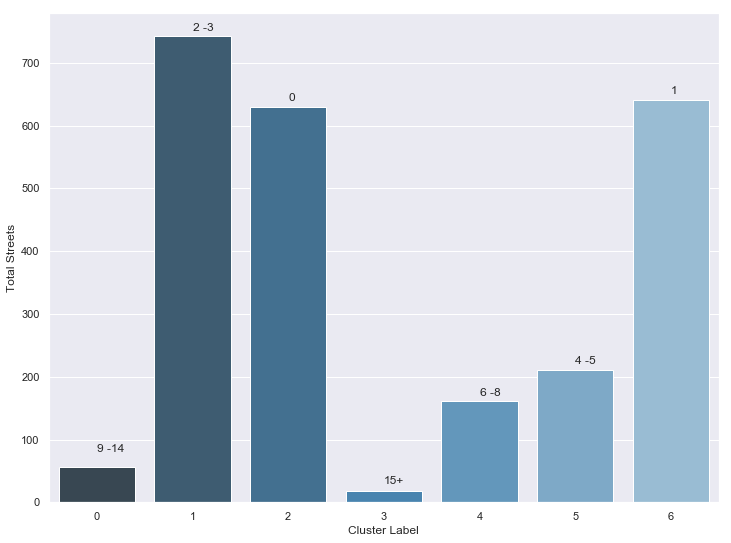

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize' : (12,9)})
sns.barplot(x = 'Cluster Label', y = 'Total Streets', data = cluster_df, palette= 'Blues_d')

plt.annotate('9 -14', xy= (0,80), xytext = (0,80))#Cluster 0
plt.annotate('2 -3', xy= (1,750), xytext = (1,750))#Cluster 1
plt.annotate('0', xy= (2,640) , xytext=(2, 640))#Cluster 2
plt.annotate('15+', xy= (3,30), xytext = (3,30))#Cluster 3
plt.annotate('6 -8', xy= (4,170), xytext = (4,170))#Cluster 4
plt.annotate('4 -5', xy= (5,220), xytext = (5,220))#Cluster 5
plt.annotate('1', xy= (6,650), xytext = (6,650))#Cluster 6

### Let us make new column label that describes the no. of transport options in each cluster

In [33]:
bins_kmeans = [0, 0.9, 1.2, 3.2, 5.2, 8.2, 14.2, 22]#Set the values -1 from the range you want, so if you want >15, so give 14; similarly if you want 9-14, give 8; want 6-8, give 5; want 4-5 give 3; want 3 give 2; want 2 give 1
bins_kmeans

[0, 0.9, 1.2, 3.2, 5.2, 8.2, 14.2, 22]

In [34]:
group_names2 = ['0', '1', '2-3', '4-5', '6-8', '9-14', '15+']

In [37]:
pd.set_option('display.max_rows', None)
orderedStreetTrikkBussMetroTog['Clustered Transport'] = pd.cut(orderedStreetTrikkBussMetroTog['Total Transport'], bins_kmeans, labels = group_names2, include_lowest= True)

#Check that the ordering is correct
orderedStreetTrikkBussMetroTog[['Clustered Transport','Total Transport']]

Clustered Transport  Total Transport
0                    15+               22
1                    15+               22
2                    15+               21
3                    15+               21
4                    15+               21
5                    15+               21
6                    15+               21
7                    15+               21
8                    15+               20
9                    15+               20
10                   15+               19
11                   15+               18
12                   15+               18
13                   15+               17
14                   15+               17
15                   15+               16
16                   15+               15
17                   15+               15
18                  9-14               14
19                  9-14               14
20                  9-14               14
21                  9-14               14
22                  9-14               13
23                  9-14               13
24                  9-14               12
25                  9-14               12
26                  9-14               12
27                  9-14               12
28                  9-14               12
29                  9-14               12
30                  9-14               12
31                  9-14               11
32                  9-14               11
33                  9-14               11
34                  9-14               11
35                  9-14               11
36                  9-14               11
37                  9-14               11
38                  9-14               11
39                  9-14               11
40                  9-14               11
41                  9-14               11
42                  9-14               11
43                  9-14               11
44                  9-14               11
45                  9-14               11
46                  9-14               10
47                  9-14               10
48                  9-14               10
49                  9-14               10
50                  9-14               10
51                  9-14               10
52                  9-14               10
53                  9-14               10
54                  9-14               10
55                  9-14               10
56                  9-14               10
57                  9-14               10
58                  9-14               10
59                  9-14                9
60                  9-14                9
61                  9-14                9
62                  9-14                9
63                  9-14                9
64                  9-14                9
65                  9-14                9
66                  9-14                9
67                  9-14                9
68                  9-14                9
69                  9-14                9
70                  9-14                9
71                  9-14                9
72                  9-14                9
73                  9-14                9
74                  9-14                9
75                   6-8                8
76                   6-8                8
77                   6-8                8
78                   6-8                8
79                   6-8                8
80                   6-8                8
81                   6-8                8
82                   6-8                8
83                   6-8                8
84                   6-8                8
85                   6-8                8
86                   6-8                8
87                   6-8                8
88                   6-8                8
89                   6-8                8
90                   6-8                8
91                   6-8                8
92                   6-8                8
93                   6-8                8
94             

In [38]:
#Ensure value counts is the same as the cluster labels
orderedStreetTrikkBussMetroTog['Clustered Transport'].value_counts().to_frame()

Clustered Transport
2-3                   742
1                     640
0                     630
4-5                   211
6-8                   162
9-14                   57
15+                    18

In [39]:
#And in Cluster df
cluster_df

Cluster Label  Total Streets
0              1            742
1              6            640
2              2            630
3              5            211
4              4            162
5              0             57
6              3             18

### Make the Folium map, this time, showing no. of transport options in each cluster

In [50]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Make map object
map_cluster = folium.Map(location=[latitude, longitude], zoom_start=11, tiles= 'Stamen Toner')#'Stamen Toner' 'Stamen Terrain' 'Mapbox Bright' 'Mapbox Control Room' MAPBOX DOES NOT RENDER


# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, .8, len(x)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to map
markers_colors = []
for lat, lng, street, cluster, group in zip(orderedStreetTrikkBussMetroTog['Street Latitude'], orderedStreetTrikkBussMetroTog['Street Longitude'],
                                   orderedStreetTrikkBussMetroTog['Street'], orderedStreetTrikkBussMetroTog['Cluster'].astype('int'), orderedStreetTrikkBussMetroTog['Clustered Transport']):
    

    #label = folium.Popup(str(street) + ' Cluster ' + str(cluster) + ' ' + str(group), parse_html=True)
    label = folium.Popup(str(street) + ' Transport Options:' + str(group) + '\nCluster:'+ str(cluster) , parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color= rainbow[cluster-1],#rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],#rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cluster)
       
map_cluster

In [47]:
#Extract cluster where total transport options are Zero
streetsWithNoTransport = orderedStreetTrikkBussMetroTog[orderedStreetTrikkBussMetroTog['Cluster'] == 2]
streetsWithNoTransport.head()

Street  Street Latitude  Street Longitude  Cluster Trikk  \
1830   Langerudveien        59.874483         10.829883        2   NaN   
1831        Åsbrekka        59.971559         10.664394        2   NaN   
1832        Liaveien        59.945642         10.797234        2   NaN   
1833        Benveien        59.897196         10.796208        2   NaN   
1834  Manglerudveien        59.901735         10.813364        2   NaN   

      Trikk Distance    0    1    2    3  ...   17 T-bane_1 T-bane_2 T-bane_3  \
1830             NaN  NaN  NaN  NaN  NaN  ...  NaN      NaN      NaN      NaN   
1831             NaN  NaN  NaN  NaN  NaN  ...  NaN      NaN      NaN      NaN   
1832             NaN  NaN  NaN  NaN  NaN  ...  NaN      NaN      NaN      NaN   
1833             NaN  NaN  NaN  NaN  NaN  ...  NaN      NaN      NaN      NaN   
1834             NaN  NaN  NaN  NaN  NaN  ...  NaN      NaN      NaN      NaN   

     T-bane_4 Train Station Total Transport Total Bus Binned Transport  \
1830      NaN           NaN               0         0              0-3   
1831      NaN           NaN               0         0              0-3   
1832      NaN           NaN               0         0              0-3   
1833      NaN           NaN               0         0              0-3   
1834      NaN           NaN               0         0              0-3   

     Clustered Transport  
1830                   0  
1831                   0  
1832                   0  
1833                   0  
1834                   0  

[5 rows x 33 columns]

In [48]:
#Save to drive
streetsWithNoTransport.to_csv(path_or_buf='./streetsWithNo_Transport.csv', index = False)